In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
def load_img():
    img = np.zeros((500,500))
#     img = cv2.imread("temp.jpg",cv2.IMREAD_GRAYSCALE)
    cv2.putText(img,text="ABCD",org=(10,350),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return img;

# plt.imshow(img)

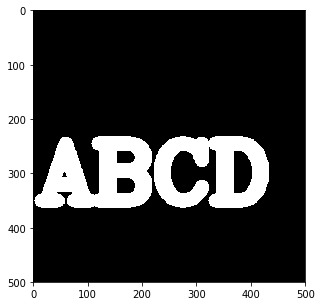

In [111]:
def display_img(img):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    
img = load_img()
display_img(img)

In [63]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

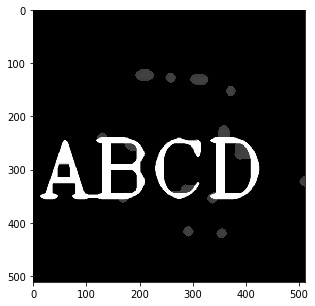

In [108]:
result = cv2.erode(img,kernel,iterations=4)
display_img(result)

In [109]:
# noise = np.random.randint(low=0,high=255,size=(500,500))
noise = np.random.randint(low=0,high=2,size=(500,500))*255
# display_img(noise)
noise

array([[255,   0, 255, ...,   0,   0,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0, 255,   0],
       ...,
       [  0, 255,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0, 255,   0],
       [  0,   0, 255, ..., 255, 255, 255]])

In [105]:
noisy_img = noise + img
display_img(noisy_img)

ValueError: operands could not be broadcast together with shapes (512,512,3) (512,512) 

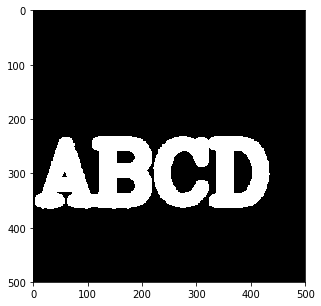

In [75]:
kernel = np.ones((5,5))
# Opening is erosion followed by dilation
opening = cv2.morphologyEx(noisy_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

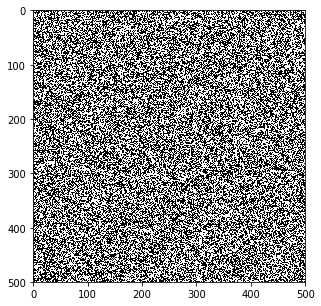

In [93]:
img = load_img()
noise = np.random.randint(low=0,high=2,size=(500,500)) * (-255)
display_img(noise)
# noise

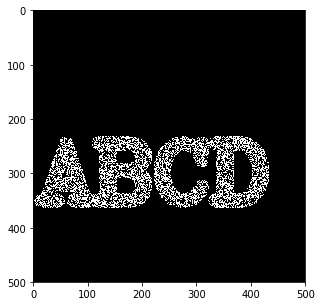

In [95]:
noise_img = img+noise
noise_img[noise_img== -255]=0
display_img(noise_img)

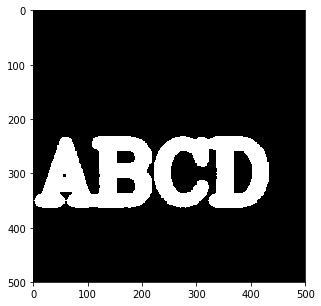

In [97]:
# Closing: Dilation followed by erosion
closing = cv2.morphologyEx(noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

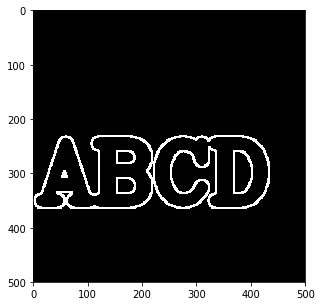

In [99]:
# Gradient: Difference between erosion and dilation
img = load_img()
grad = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(grad)